In [1]:
from dm_control import suite
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
env = suite.load(domain_name="cartpole", task_name="balance")

In [25]:
env.physics.named.data.xipos._axes.row.names

['world', 'cart', 'pole_1']

In [4]:
# See http://www.mujoco.org/book/APIreference.html#mjData for references on how to get the quantities needed
action_spec = env.action_spec()

def evolve():
    time_step = env.reset()
    
    #pole_xpos = [np.copy(env.physics.named.data.xpos["pole_1"])]
    #cart_xpos = [np.copy(env.physics.named.data.xpos["cart"])]
    
    pole_com = [np.copy(env.physics.named.data.xipos["pole_1"])]
    cart_com = [np.copy(env.physics.named.data.xipos["cart"])]
    hinge_anchor = [np.copy(env.physics.named.data.xanchor["hinge_1"])]
        
    while not time_step.last():
        action = np.zeros(action_spec.shape)
        time_step = env.step(action)
        
        # why are pole and cart xpos the same?
        #pole_xpos.append(np.copy(env.physics.named.data.xpos["pole_1"]))
        #cart_xpos.append(np.copy(env.physics.named.data.xpos["cart"]))
        pole_com.append(np.copy(env.physics.named.data.xipos["pole_1"]))
        cart_com.append(np.copy(env.physics.named.data.xipos["cart"]))
        hinge_anchor.append(np.copy(env.physics.named.data.xanchor["hinge_1"]))
        
    return np.stack(pole_com), np.stack(cart_com), np.stack(hinge_anchor)

In [5]:
pole_com, cart_com, hinge_anchor = evolve()

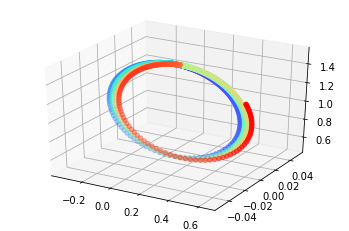

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = cm.rainbow(np.linspace(0, 1, len(pole_com)))

ax.scatter(*pole_com.T, color=colors)

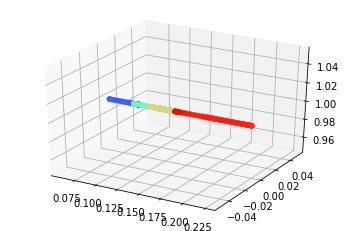

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = cm.rainbow(np.linspace(0, 1, len(cart_com)))

ax.scatter(*cart_com.T, color=colors)

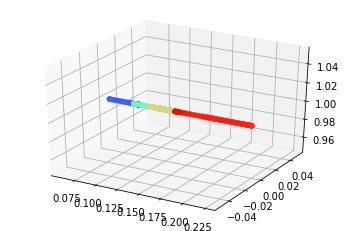

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = cm.rainbow(np.linspace(0, 1, len(hinge_anchor)))

ax.scatter(*hinge_anchor.T, color=colors)

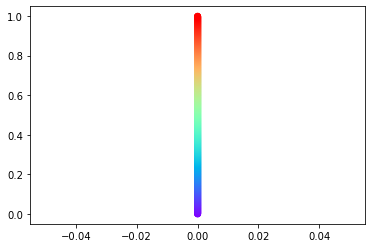

In [21]:
plt.scatter(np.zeros(len(colors)), np.arange(len(colors)) / len(colors), color=colors)

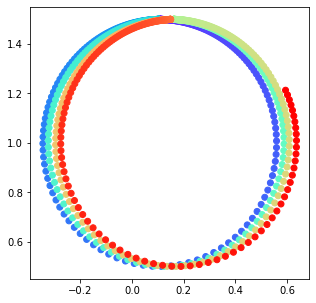

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
colors = cm.rainbow(np.linspace(0, 1, len(pole_com)))
ax.scatter(pole_com[:, 0], pole_com[:, 2], color=colors)

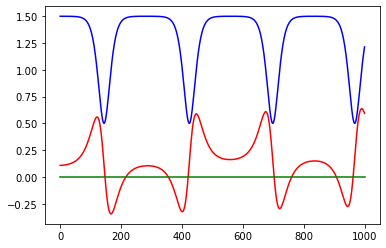

In [9]:
fig, ax = plt.subplots()
ax.plot(pole_com[:, 0], 'r')
ax.plot(pole_com[:, 1], 'g')
ax.plot(pole_com[:, 2], 'b')

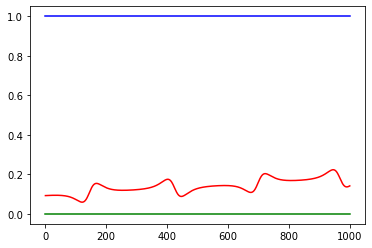

In [10]:
fig, ax = plt.subplots()
ax.plot(cart_com[:, 0], 'r')
ax.plot(cart_com[:, 1], 'g')
ax.plot(cart_com[:, 2], 'b')

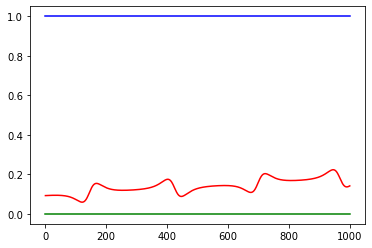

In [11]:
fig, ax = plt.subplots()
ax.plot(hinge_anchor[:, 0], 'r')
ax.plot(hinge_anchor[:, 1], 'g')
ax.plot(hinge_anchor[:, 2], 'b')

In [24]:
# Check if constraint is held
((pole_com - cart_com)**2).sum(-1)

array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25])